In [164]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

dataset = pd.read_csv("dataset.csv")

In [165]:
dataset["creatinine"].fillna(dataset["creatinine"].mean(),inplace = True)
dataset["po2"].fillna(dataset["po2"].mean(),inplace = True)
dataset["fio2"].fillna(dataset["fio2"].mean(),inplace = True)
dataset["pco2"].fillna(dataset["pco2"].mean(),inplace = True)
dataset["bp_min"].fillna(dataset["bp_min"].mean(),inplace = True)
dataset["bp_max"].fillna(dataset["bp_max"].mean(),inplace = True)
dataset["pain"].fillna(dataset["pain"].mean(),inplace = True)
dataset["k"].fillna(dataset["k"].mean(),inplace = True)
dataset["hr_min"].fillna(dataset["hr_min"].mean(),inplace = True)
dataset["hr_max"].fillna(dataset['hr_max'].mean(),inplace = True)
dataset["gcs_min"].fillna(dataset["gcs_min"].mean(),inplace = True)
dataset["gcs_max"].fillna(dataset["gcs_max"].mean(),inplace = True)
dataset["bun"].fillna(dataset["bun"].mean(),inplace = True)
dataset["hco3"].fillna(dataset["hco3"].mean(),inplace = True)
dataset["airway"].fillna(dataset["airway"].mean(),inplace = True)
dataset["resp_min"].fillna(dataset["resp_min"].mean(),inplace = True)
dataset["resp_max"].fillna(dataset["resp_max"].mean(),inplace = True)
dataset["haemoglobin"].fillna(dataset["haemoglobin"].mean(),inplace = True)
dataset["spo2_min"].fillna(dataset["spo2_min"].mean(),inplace = True)
dataset["spo2_max"].fillna(dataset["spo2_max"].mean(),inplace = True)
dataset["temp_min"].fillna(dataset["temp_min"].mean(),inplace = True)
dataset["temp_max"].fillna(dataset["temp_max"].mean(),inplace = True)
dataset["na"].fillna(dataset["na"].mean(),inplace = True)

In [166]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [192]:
def PolynomialLogisticRegression():
    return Pipeline([
        ('poly', PolynomialFeatures()),
        ('log_reg', LogisticRegression(solver='liblinear'))
    ])

In [168]:
features = ['creatinine','po2','fio2','pco2','bp_min','bp_max','pain','k','hr_min','hr_max','gcs_min','gcs_max','bun','hco3','airway','resp_min','resp_max','haemoglobin','spo2_min','spo2_max','temp_min','temp_max','na']

x = dataset[features]
y= dataset['outcome']

In [178]:
sc=StandardScaler()

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2)
sc.fit(x)
xtrain=sc.transform(xtrain)
xtest=sc.transform(xtest)

In [179]:
classifier1 = PolynomialLogisticRegression()
classifier1.poly__degree=1
classifier1.fit(xtrain, ytrain)
y_pred1 = classifier1.predict(xtest)

In [180]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred1)
print ("Confusion Matrix: \n", cm)
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(ytest, y_pred1))

Confusion Matrix: 
 [[312 102]
 [ 87 291]]
Accuracy :  0.7613636363636364


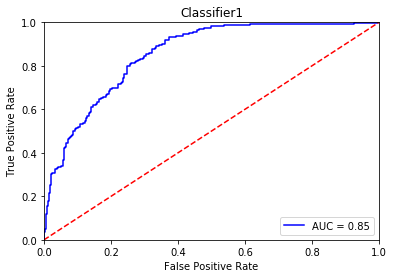

In [181]:
from sklearn.metrics import roc_auc_score,roc_curve
fpr, tpr, threshold = metrics.roc_curve(ytest, classifier1.predict_proba(xtest)[:,1])
roc_auc = metrics.auc(fpr, tpr)

plt.title('Classifier1')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [198]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

grid_param1={'log_reg__penalty':['l1','l2'],'log_reg__C':[100,10,1,0.1,0.01],'poly__degree':[1,2]}
classifier2=PolynomialLogisticRegression()
kfold = StratifiedKFold(n_splits=10, shuffle = True,random_state=0)
grid_clf1=GridSearchCV(classifier2,grid_param1,cv=kfold,verbose=2,n_jobs=-1,refit=True,scoring='roc_auc')
grid_clf1.fit(xtrain,ytrain)
print(grid_clf1.best_params_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  91 tasks      | elapsed:  1.2min


{'log_reg__C': 0.1, 'log_reg__penalty': 'l1', 'poly__degree': 1}


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.3min finished


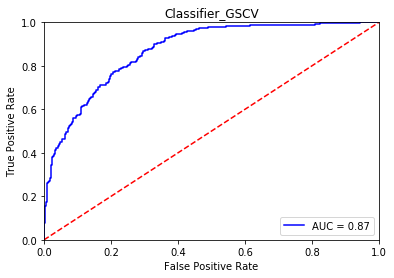

In [199]:
fpr, tpr, threshold = metrics.roc_curve(ytest, grid_clf1.predict_proba(xtest)[:,1])
roc_auc = metrics.auc(fpr, tpr)

plt.title('Classifier_GSCV')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

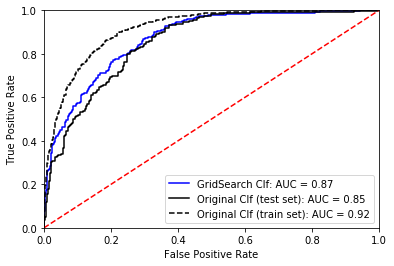

In [200]:
fpr, tpr, threshold = metrics.roc_curve(ytest, grid_clf1.predict_proba(xtest)[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label = 'GridSearch Clf: AUC = %0.2f' % roc_auc)

fpr, tpr, threshold = metrics.roc_curve(ytest, classifier1.predict_proba(xtest)[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, 'k', label = 'Original Clf (test set): AUC = %0.2f' % roc_auc)

fpr, tpr, threshold = metrics.roc_curve(ytrain, classifier1.predict_proba(xtrain)[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, 'k--', label = 'Original Clf (train set): AUC = %0.2f' % roc_auc)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [201]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred1)
print ("Original Confusion Matrix: \n", cm)
from sklearn.metrics import accuracy_score
print ("Original Accuracy: ", accuracy_score(ytest, y_pred1))
from sklearn.metrics import precision_score, recall_score, f1_score
print ('Original Precision:',precision_score(ytest,y_pred1))
print ('Original recall:',recall_score(ytest,y_pred1))
print ('Original f1:',f1_score(ytest,y_pred1))

Original Confusion Matrix: 
 [[312 102]
 [ 87 291]]
Original Accuracy:  0.7613636363636364
Original Precision: 0.7404580152671756
Original recall: 0.7698412698412699
Original f1: 0.754863813229572


In [202]:
cm1 = confusion_matrix(ytest,grid_clf1.predict(xtest))
grid_pred=grid_clf1.predict(xtest)
print ("GSCV Confusion Matrix: \n", cm1)
print ("GSCV Accuracy: ", accuracy_score(ytest, grid_pred))
print ('GSCV Precision:',precision_score(ytest, grid_pred))
print ('GSCV Recall:',recall_score(ytest, grid_pred))
print ('GSCV f1:',f1_score(ytest,grid_pred))

GSCV Confusion Matrix: 
 [[308 106]
 [ 70 308]]
GSCV Accuracy:  0.7777777777777778
GSCV Precision: 0.7439613526570048
GSCV Recall: 0.8148148148148148
GSCV f1: 0.7777777777777778
